# Building qualitative windows for three different data sources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

In [3]:
palette = sns.color_palette('viridis', n_colors=8)
palette

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [4]:
palette2 = sns.color_palette('rocket', n_colors=4)
palette2

[(0.29977678, 0.11356089, 0.29254823),
 (0.63139686, 0.10067417, 0.35664819),
 (0.90848638, 0.24568473, 0.24598324),
 (0.96298491, 0.6126247, 0.45145074)]

In [5]:
palette3 = sns.color_palette('deep', n_colors=8)
palette3

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)]

## Obtaining data

### Source 1: Toapanta et al. (2009)

In [6]:
df_Toapanta = pd.read_csv("influenza/Toapanta_CD8.csv")

### Source 2: Eriksson et al. (2009)

In [7]:
df_Eriksson = pd.read_csv("influenza/Eriksson_CD8.csv")

### Source 3: McGill et al. (2022)

In [8]:
df_McGill = pd.DataFrame({
    'Days': [2, 4, 6, 8, 10],
    'CD8': [86456, 634004, 4899134, 8818444, 8530259]
})

### Source 4: Van Leuven et al. (2021)

In [9]:
df_VanLeuven = pd.read_csv("influenza/Van_Leuven_CD8.csv")

### Merging data to export

In [10]:
merged_df = pd.concat([df_Toapanta, df_Eriksson, df_McGill, df_VanLeuven])
merged_df = merged_df.sort_values(by="Days")

In [11]:
merged_df.to_csv("influenza/CD8_data.csv", index=False)

In [12]:
merged_df['CD8'].max()-merged_df['CD8'].min()

8818015

## Normalizing

In [13]:
# Apply Min-Max normalization
minCD8 = df_Toapanta['CD8'].min()
maxCD8 = df_Toapanta['CD8'].max()
df_Toapanta['CD8_norm'] = (df_Toapanta['CD8'] - minCD8) / (maxCD8 - minCD8)

minCD8 = df_Eriksson['CD8'].min()
maxCD8 = df_Eriksson['CD8'].max()
df_Eriksson['CD8_norm'] = (df_Eriksson['CD8'] - minCD8) / (maxCD8 - minCD8)

minCD8 = df_McGill['CD8'].min()
maxCD8 = df_McGill['CD8'].max()
df_McGill['CD8_norm'] = (df_McGill['CD8'] - minCD8) / (maxCD8 - minCD8)

minCD8 = df_VanLeuven['CD8'].min()
maxCD8 = df_VanLeuven['CD8'].max()
df_VanLeuven['CD8_norm'] = (df_VanLeuven['CD8'] - minCD8) / (maxCD8 - minCD8)

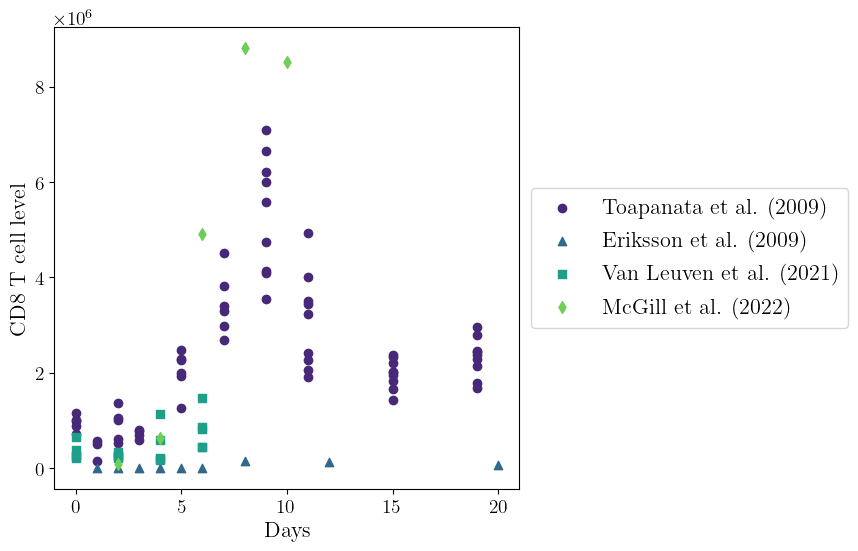

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6), facecolor='white')

axs.scatter(df_Toapanta['Days'], df_Toapanta['CD8'],
            color=palette[0], label='Toapanata et al. (2009)', marker='o')
axs.scatter(df_Eriksson['Days'], df_Eriksson['CD8'],
            color=palette[2], label='Eriksson et al. (2009)', marker='^')
axs.scatter(df_VanLeuven['Days'], df_VanLeuven['CD8'],
            color=palette[4], label='Van Leuven et al. (2021)', marker='s')
axs.scatter(df_McGill['Days'], df_McGill['CD8'],
            color=palette[6], label='McGill et al. (2022)', marker='d')
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel('Days')
axs.set_ylabel('CD8 T cell level')
# axs.grid()
# plt.savefig('CD8data.png', bbox_inches='tight')
plt.show()

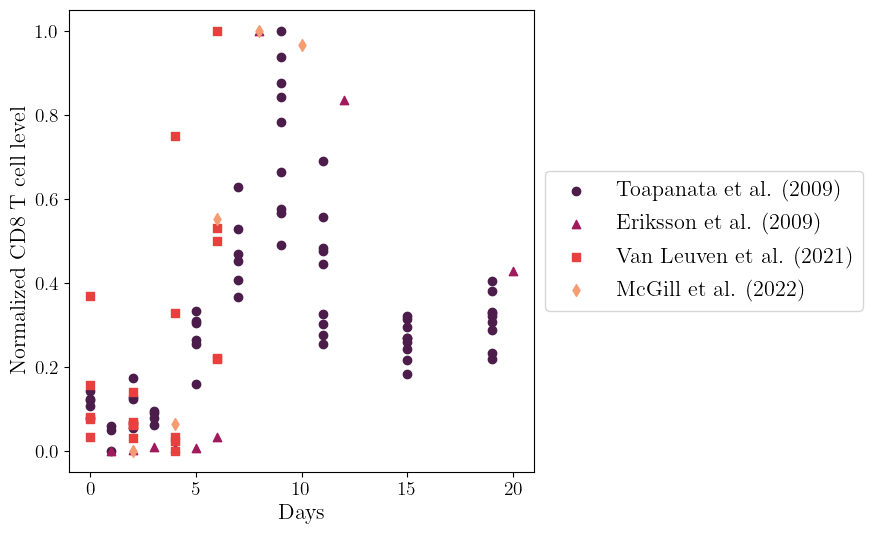

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6), facecolor='white')

axs.scatter(df_Toapanta['Days'], df_Toapanta['CD8_norm'],
            color=palette2[0], label='Toapanata et al. (2009)', marker='o')
axs.scatter(df_Eriksson['Days'], df_Eriksson['CD8_norm'],
            color=palette2[1], label='Eriksson et al. (2009)', marker='^')
axs.scatter(df_VanLeuven['Days'], df_VanLeuven['CD8_norm'],
            color=palette2[2], label='Van Leuven et al. (2021)', marker='s')
axs.scatter(df_McGill['Days'], df_McGill['CD8_norm'],
            color=palette2[3], label='McGill et al. (2022)', marker='d')
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs.set_xlabel('Days')
axs.set_ylabel('Normalized CD8 T cell level')
# axs.grid()
# plt.savefig('Data.png', bbox_inches='tight')
plt.show()

### Merging all data

In [16]:
# Merge the dataframes
dfAll = pd.concat([df_Toapanta, df_Eriksson, df_McGill, df_VanLeuven])
# dfAll = pd.concat([df_Toapanta, df_Eriksson, df_McGill])

# Sort the merged dataframe by the 'Days' column
dfAll = dfAll.sort_values(by='Days').reset_index(drop=True)

## Clustering CD8 data

In [17]:
# Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Test for k from 1 to 10

Xdata = dfAll[['CD8_norm']].values

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Xdata)
    inertia.append(kmeans.inertia_)

diff = np.diff(inertia)
diff_r = diff[1:] / diff[:-1]
optimal_k = k_range[np.argmin(diff_r) + 1]

In [18]:
inertia_cd8 = inertia
optK_cd8 = optimal_k

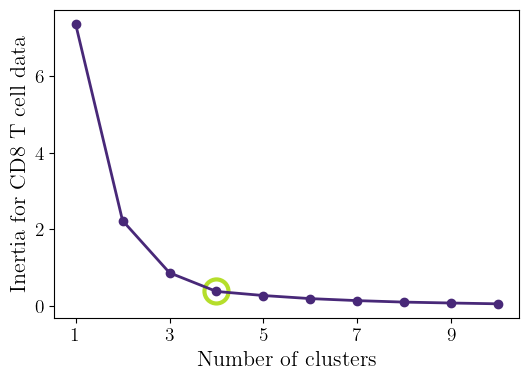

In [19]:
# Plot the elbow method
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia_cd8, marker='o', color=palette[0], lw = 2)
plt.scatter(optK_cd8, inertia_cd8[optK_cd8 - 1],
            s=300, facecolors='none', edgecolors=palette[7], lw = 3)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia for CD8 T cell data')
plt.xticks([1,3,5,7,9])
# plt.savefig('cd8_elbow.svg', bbox_inches='tight')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=optK_cd8, n_init=10)
kmeans.fit(Xdata)
dfAll['CD8 labels'] = kmeans.labels_

## Clustering Days data

In [21]:
# Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Test for k from 1 to 10

Xdata = dfAll[['Days']].values

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Xdata)
    inertia.append(kmeans.inertia_)

diff = np.diff(inertia)
diff_r = diff[1:] / diff[:-1]
optimal_k = k_range[np.argmin(diff_r) + 1]

In [22]:
inertia_days = inertia
optK_days = optimal_k
optK_days = 3

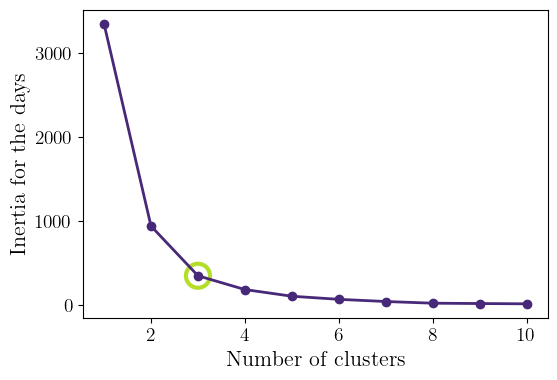

In [23]:
# Plot the elbow method
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia_days, marker='o', color=palette[0], lw = 2)
plt.scatter(optK_days, inertia_days[optK_days - 1],
            s=300, facecolors='none', edgecolors=palette[7], lw = 3)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia for the days')
# plt.savefig('days_elbow.svg', bbox_inches='tight')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=optK_days, n_init=10)
kmeans.fit(Xdata)
dfAll['Days labels'] = kmeans.labels_

## Bulding the mesh to determine the qualitative windows

In [25]:
# Getting the mesh
xMin = []
xMax = []
unique_days_labels = sorted(dfAll['Days labels'].unique())
for label in unique_days_labels:
    x = dfAll[dfAll['Days labels'] == label]['Days'].min()
    xMin.append(x)
    x = dfAll[dfAll['Days labels'] == label]['Days'].max()
    xMax.append(x)
xMin.sort()
xMax.sort()

xCell = [xMin[0]]
for i in range(len(xMin)-1):
    xCell.append((xMax[i]+xMin[i+1])/2)
xCell.append(xMax[-1] + xMin[-1] - xCell[-1])

# Adding horizontal lines for CD8 labels
yMin = []
yMax = []
unique_cd8_labels = sorted(dfAll['CD8 labels'].unique())
for label in unique_cd8_labels:
    y = dfAll[dfAll['CD8 labels'] == label]['CD8_norm'].min()
    yMin.append(y)
    y = dfAll[dfAll['CD8 labels'] == label]['CD8_norm'].max()
    yMax.append(y)
yMin.sort()
yMax.sort()

yCell = [yMin[0]]
for i in range(len(yMin)-1):
    yCell.append((yMax[i]+yMin[i+1])/2)
yCell.append(yMax[-1])

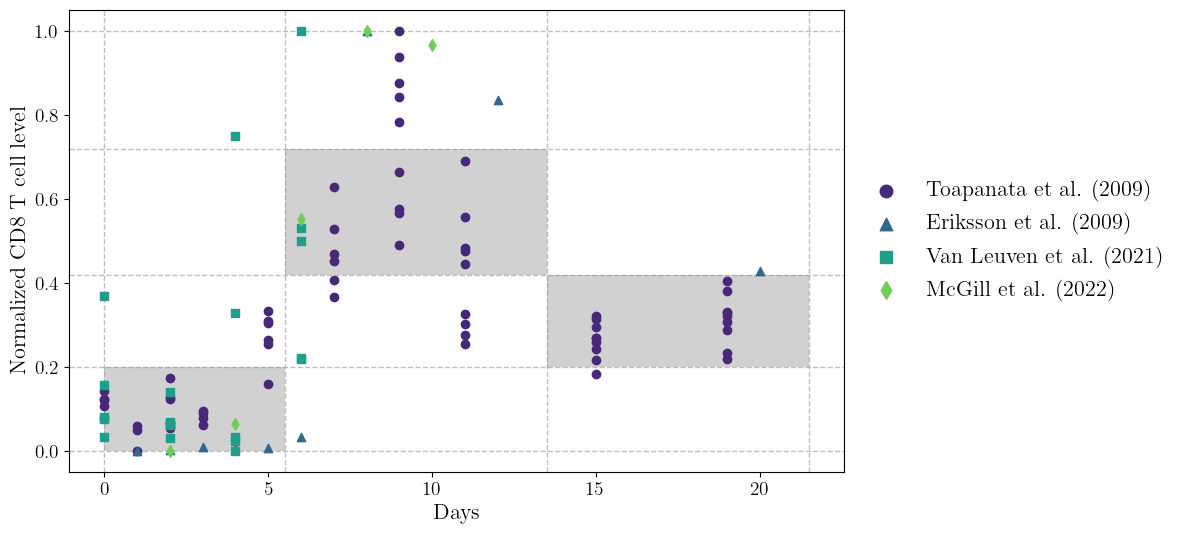

In [26]:
# Plotting the scatter plot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6), facecolor='white')

axs.scatter(df_Toapanta['Days'], df_Toapanta['CD8_norm'], marker='o',
            color=palette[0], label='Toapanata et al. (2009)')
axs.scatter(df_Eriksson['Days'], df_Eriksson['CD8_norm'], marker='^',
            color=palette[2], label='Eriksson et al. (2009)')
axs.scatter(df_VanLeuven['Days'], df_VanLeuven['CD8_norm'], marker='s',
            color=palette[4], label='Van Leuven et al. (2021)')
axs.scatter(df_McGill['Days'], df_McGill['CD8_norm'], marker='d',
            color=palette[6], label='McGill et al. (2022)')

# Adding vertical lines for Days labels
for i in range(len(xCell)):
    axs.axvline(x=xCell[i], color=palette3[7], linestyle='--', alpha = 0.55, zorder=0, lw=1)
    # axs.axvline(x=xCell[i], color='k', linestyle='--', alpha = 0.55, zorder=0, lw=1)

# Adding horizontal lines for CD8 labels
for i in range(len(yCell)):
    axs.axhline(y=yCell[i], color=palette3[7], linestyle='--', alpha = 0.55, zorder=0, lw=1)
    # axs.axhline(y=yCell[i], color='k', linestyle='--', alpha = 0.55, zorder=0, lw=1)

# Manually added squares
xDiff = np.diff(xCell)
yDiff = np.diff(yCell)
rect1 = plt.Rectangle((xCell[0], yCell[0]), xDiff[0], yDiff[0], fc=palette3[7], alpha = 0.4, zorder=-1)
rect2 = plt.Rectangle((xCell[1], yCell[2]), xDiff[1], yDiff[2], fc=palette3[7], alpha = 0.4, zorder=-1)
# rect3 = plt.Rectangle((xCell[1], yCell[3]), xDiff[1], yDiff[3], fc=palette3[7], alpha = 0.4, zorder=-1)
rect4 = plt.Rectangle((xCell[2], yCell[1]), xDiff[2], yDiff[1], fc=palette3[7], alpha = 0.4, zorder=-1)
axs.add_patch(rect1)
axs.add_patch(rect2)
# axs.add_patch(rect3)
axs.add_patch(rect4)

axs.set_xlabel('Days')
axs.set_ylabel('Normalized CD8 T cell level')
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=1.5, frameon=False)
# plt.savefig('windows.pdf', bbox_inches='tight')

plt.show()

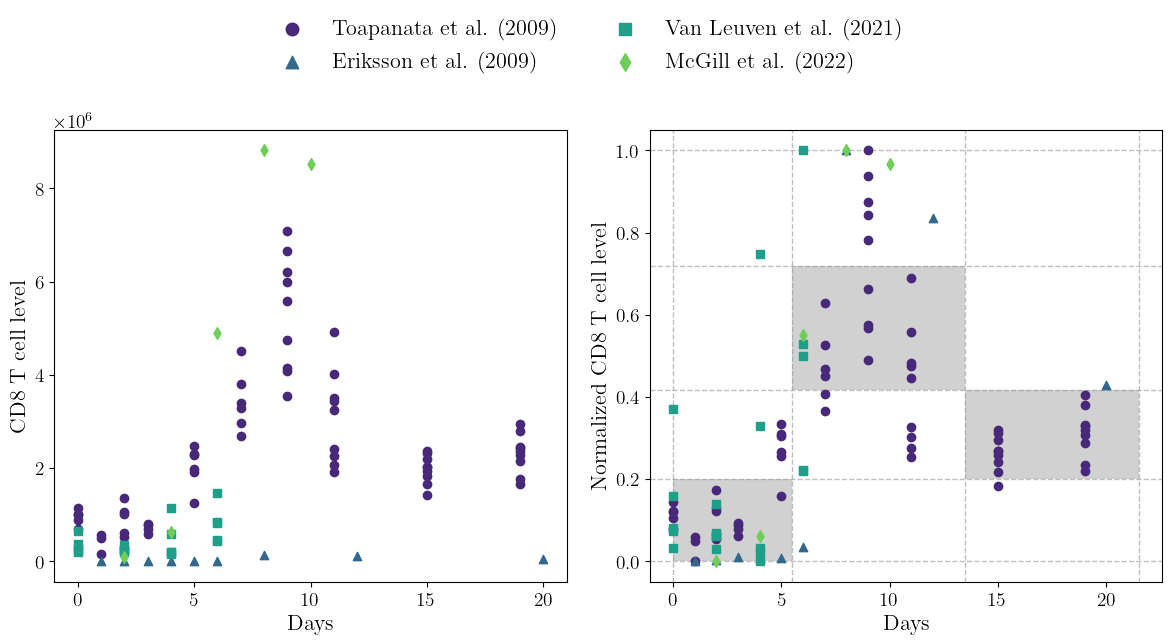

In [27]:
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10), facecolor='white')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), facecolor='white')

#################### Figure a

ax[0].scatter(df_Toapanta['Days'], df_Toapanta['CD8'],
            color=palette[0], label='Toapanata et al. (2009)', marker='o')
ax[0].scatter(df_Eriksson['Days'], df_Eriksson['CD8'],
            color=palette[2], label='Eriksson et al. (2009)', marker='^')
ax[0].scatter(df_VanLeuven['Days'], df_VanLeuven['CD8'],
            color=palette[4], label='Van Leuven et al. (2021)', marker='s')
ax[0].scatter(df_McGill['Days'], df_McGill['CD8'],
            color=palette[6], label='McGill et al. (2022)', marker='d')
# ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_xticks(range(0, 21, 5))
ax[0].set_xlabel('Days')
ax[0].set_ylabel('CD8 T cell level')
# ax[0].grid()

#################### Figure b

ax[1].scatter(df_Toapanta['Days'], df_Toapanta['CD8_norm'], marker='o',
            color=palette[0], label='Toapanata et al. (2009)')
ax[1].scatter(df_Eriksson['Days'], df_Eriksson['CD8_norm'], marker='^',
            color=palette[2], label='Eriksson et al. (2009)')
ax[1].scatter(df_VanLeuven['Days'], df_VanLeuven['CD8_norm'], marker='s',
            color=palette[4], label='Van Leuven et al. (2021)')
ax[1].scatter(df_McGill['Days'], df_McGill['CD8_norm'], marker='d',
            color=palette[6], label='McGill et al. (2022)')

# Adding vertical lines for Days labels
for i in range(len(xCell)):
    ax[1].axvline(x=xCell[i], color=palette3[7], linestyle='--', alpha = 0.55, zorder=0, lw=1)

# Adding horizontal lines for CD8 labels
for i in range(len(yCell)):
    ax[1].axhline(y=yCell[i], color=palette3[7], linestyle='--', alpha = 0.55, zorder=0, lw=1)

# Manually added squares
xDiff = np.diff(xCell)
yDiff = np.diff(yCell)
rect1 = plt.Rectangle((xCell[0], yCell[0]), xDiff[0], yDiff[0], fc=palette3[7], alpha = 0.4, zorder=-1)
rect2 = plt.Rectangle((xCell[1], yCell[2]), xDiff[1], yDiff[2], fc=palette3[7], alpha = 0.4, zorder=-1)
# rect3 = plt.Rectangle((xCell[1], yCell[3]), xDiff[1], yDiff[3], fc=palette3[7], alpha = 0.4, zorder=-1)
rect4 = plt.Rectangle((xCell[2], yCell[1]), xDiff[2], yDiff[1], fc=palette3[7], alpha = 0.4, zorder=-1)
ax[1].add_patch(rect1)
ax[1].add_patch(rect2)
# ax[1].add_patch(rect3)
ax[1].add_patch(rect4)

ax[1].set_xlabel('Days')
ax[1].set_ylabel('Normalized CD8 T cell level')

# Create a shared legend outside and centered
handles, labels = ax[0].get_legend_handles_labels()  # Extract handles & labels from the first plot

# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=1.5, frameon=False)
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 1.02), ncol=2, markerscale=1.5, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap

# plt.savefig('data_windows.pdf', bbox_inches='tight')

plt.show()

In [28]:
qualWin = [[xCell[0], xCell[1], yCell[0], yCell[1]]]
qualWin.append([xCell[1], xCell[2], yCell[2], yCell[3]])
qualWin.append([xCell[2], xCell[3], yCell[1], yCell[2]])

With Van Leuven data set:

In [29]:
dfQualWin = pd.DataFrame(qualWin, columns=['tmin', 'tmax', 'Tmin', 'Tmax'])
dfQualWin

,tmin,tmax,Tmin,Tmax
0,0.0,5.5,0.000000,0.199998
1,5.5,13.5,0.417897,0.718703
2,13.5,21.5,0.199998,0.417897


Without Van Leuven data set:

In [30]:
dfQualWin = pd.DataFrame(qualWin, columns=['tmin', 'tmax', 'Tmin', 'Tmax'])
dfQualWin

,tmin,tmax,Tmin,Tmax
0,0.0,5.5,0.000000,0.199998
1,5.5,13.5,0.417897,0.718703
2,13.5,21.5,0.199998,0.417897


In [31]:
dfQualWin.to_csv('influenza/qualTcell.csv', index=False, float_format='%.6f')